## Setting up

In [ ]:
# for install requirement packages for using in Colab
# !pip install minisom
# !pip install matplotlib
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn
# !pip install sklearn-som
# !pip install seaborn

In [104]:
# Import libraries
from minisom import MiniSom  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [99]:
# get dataset
# ref: https://www.kaggle.com/datasets/andrewabeles/dnd-stats/data
df = pd.read_csv("stats.csv")
df.head()

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
0,dragonborn,79,279,30,14,15,12,7,13,16
1,dragonborn,79,331,30,11,11,11,13,13,17
2,dragonborn,71,230,30,14,16,11,13,10,18
3,dragonborn,75,265,30,8,19,7,10,13,16
4,dragonborn,72,229,30,8,17,14,14,10,9


In [91]:
# Separate the features
race = df["race"].tolist()
height = df["height"].tolist()
weight = df["weight"].tolist()
speed = df["speed"].tolist()
strength = df["strength"].tolist()
dexterity = df["dexterity"].tolist()
constitution = df["constitution"].tolist()
intelligence = df["intelligence"].tolist()
wisdom = df["wisdom"].tolist()
charisma = df["charisma"].tolist()

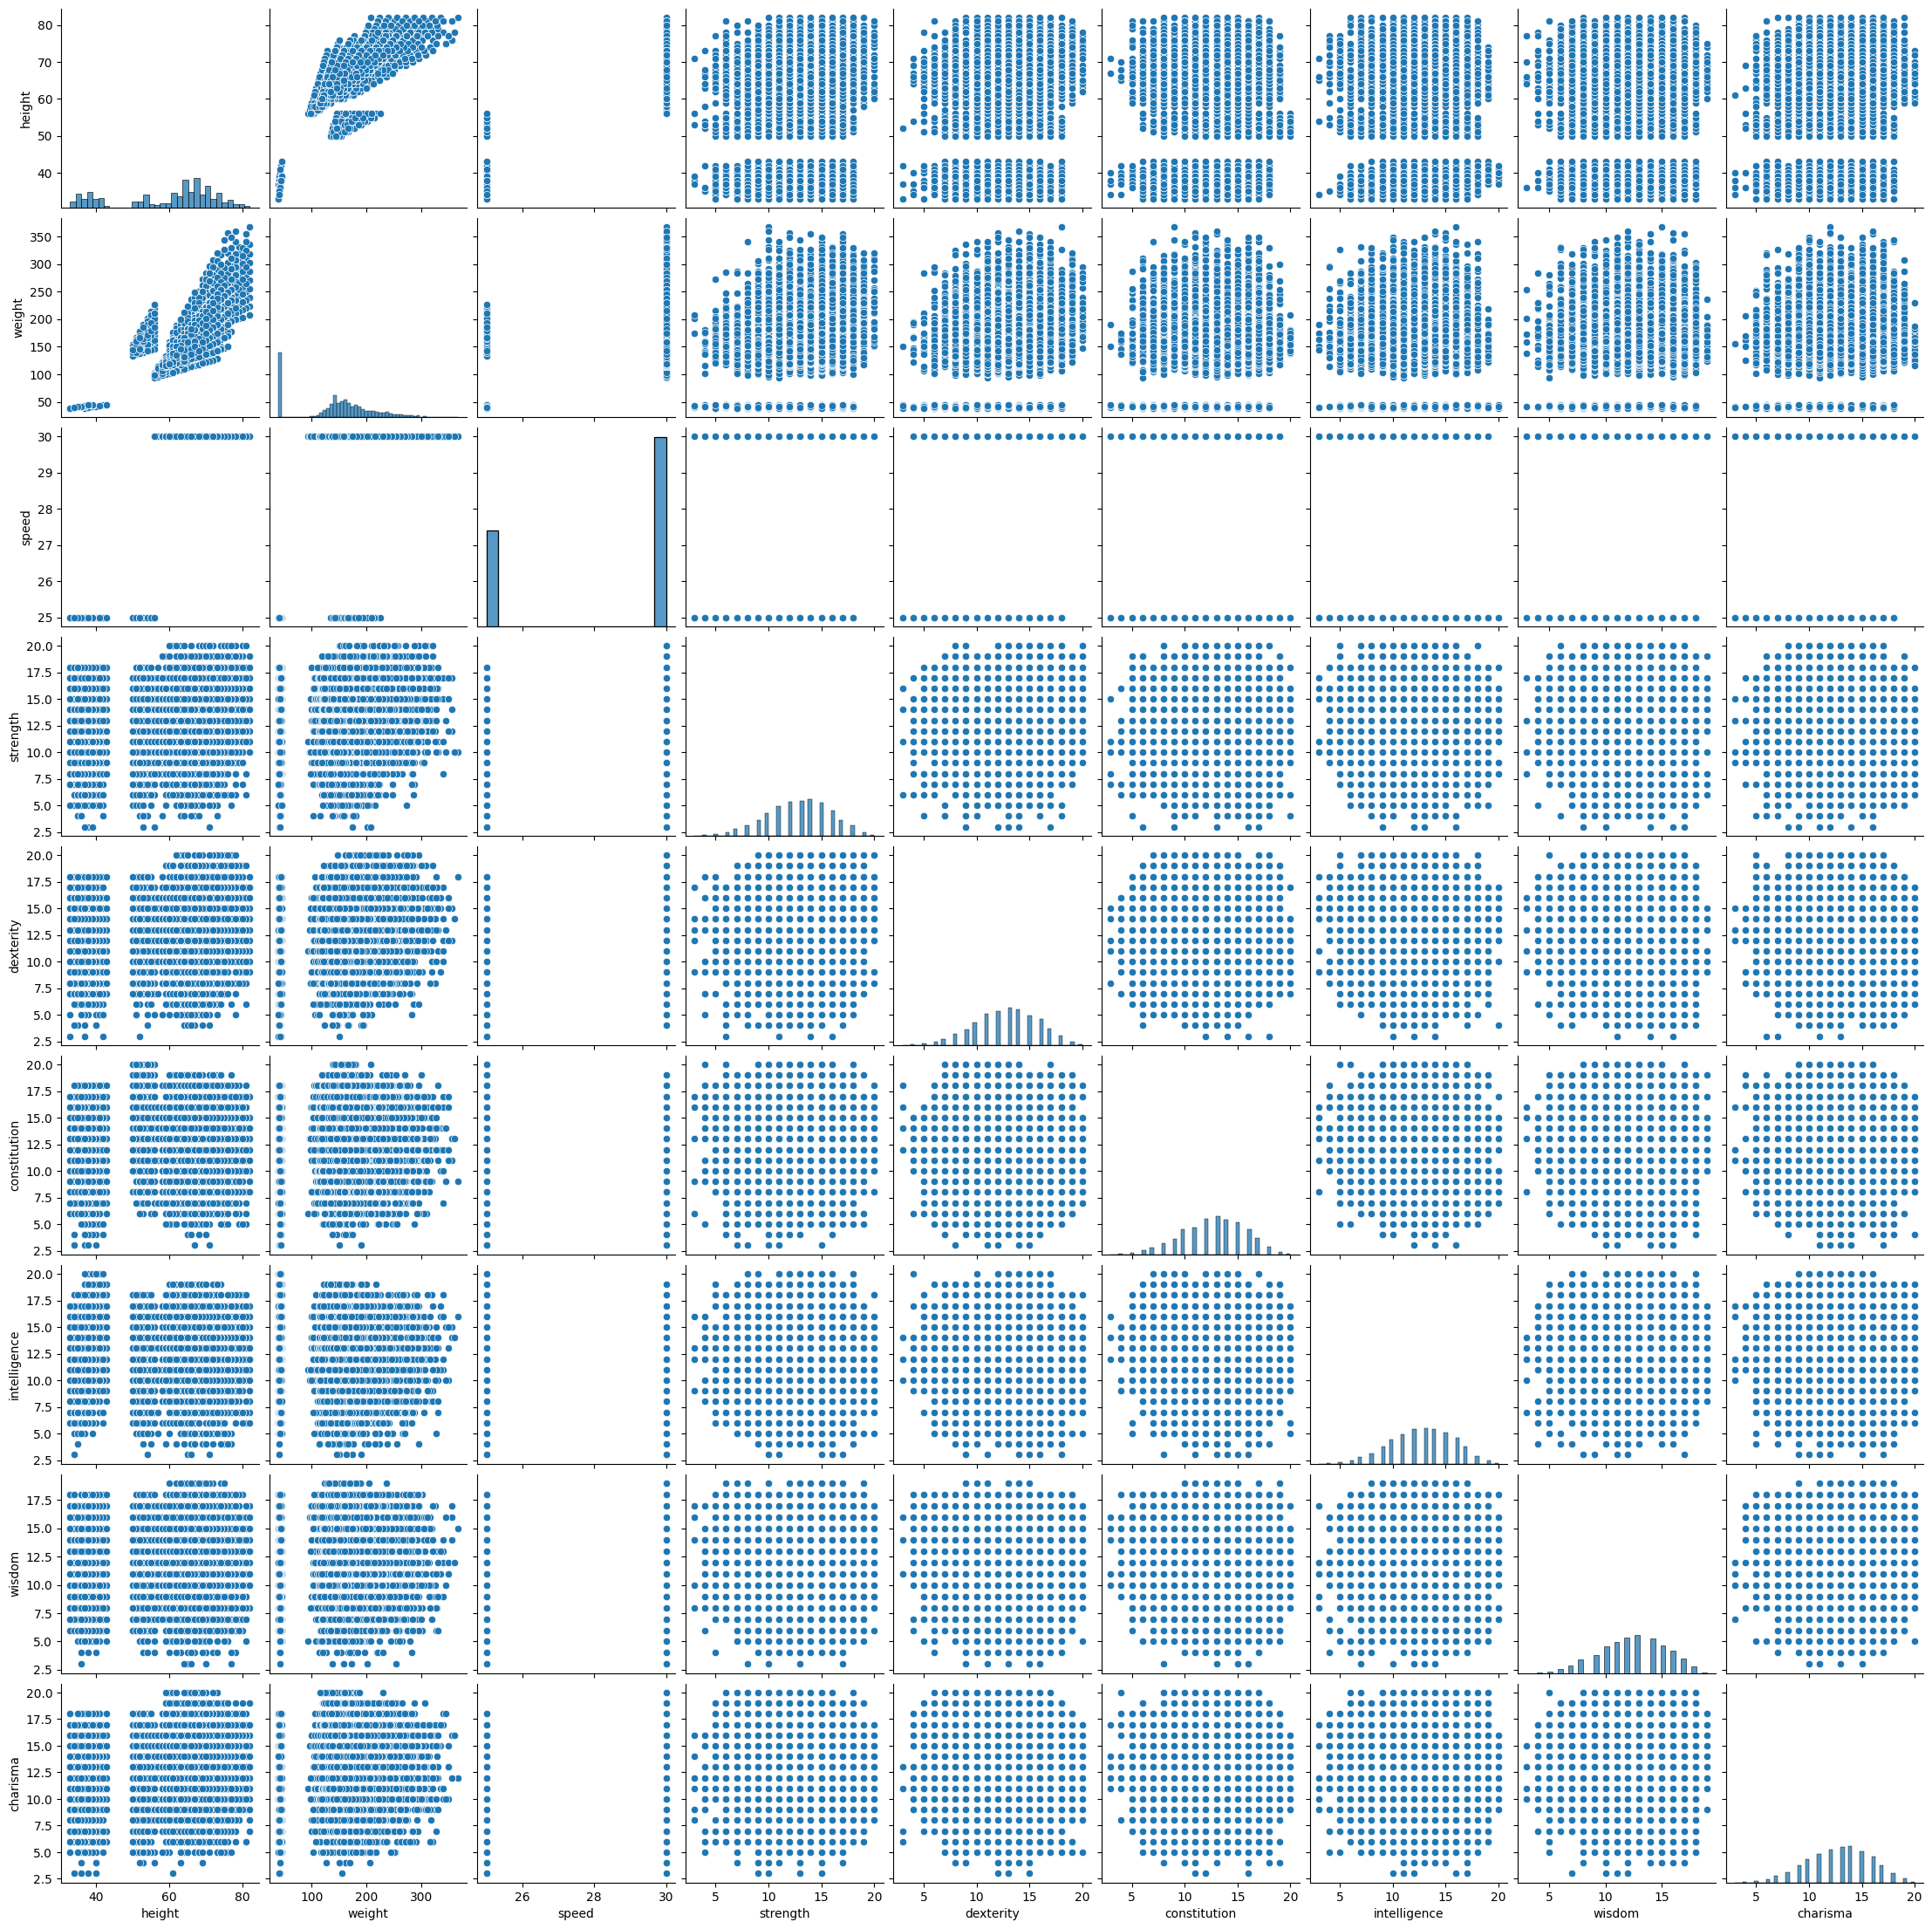

In [92]:
# Plot the data between all the features to see which one has chance to detect apparent cluster 
# The one that might be a good candidate is strength - weight
wanted_columns = df.columns[1:]
pairplot = sns.pairplot(df[wanted_columns])
# pairplot.savefig("pairplot.png")

## Use SOM to cluster race

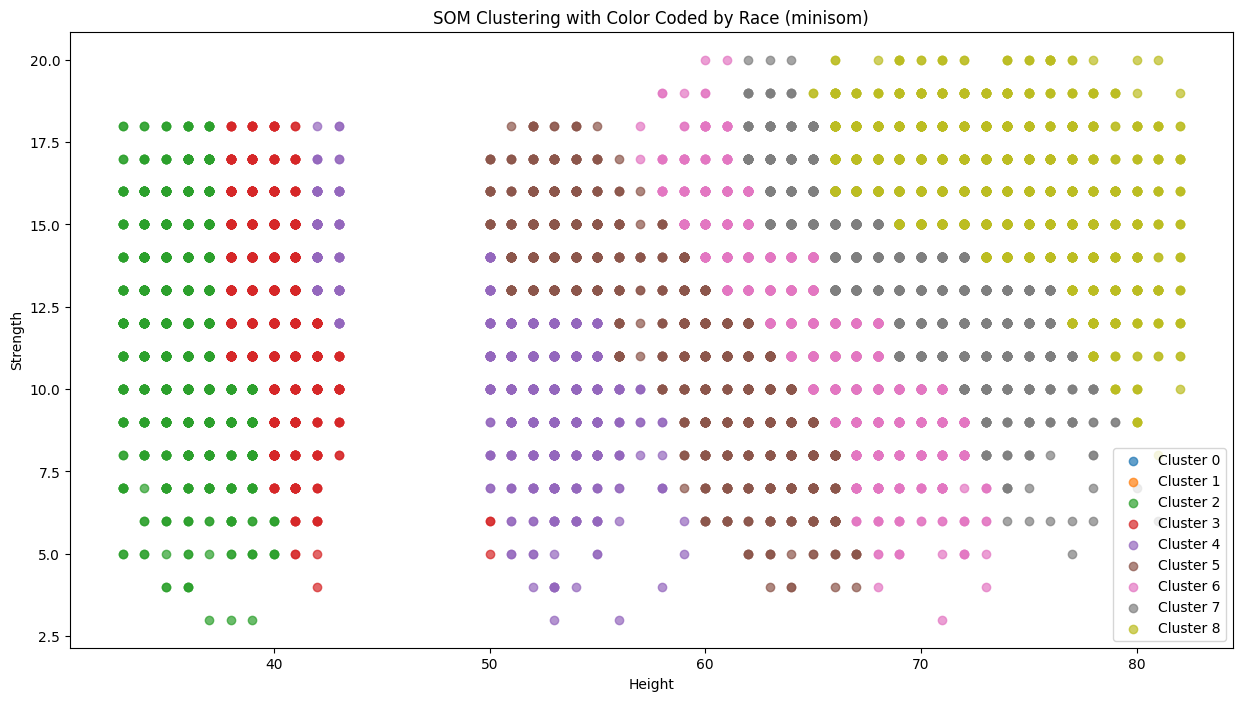

In [123]:
# Extracting the features (1-height, 4-strength)

# choose the interest data
# 1-height, 2-weight, 3-speed, 4-strength, 5-dexterity, 6-constitution, 7-wisdom, 8-intelligence, 9-charisma

# wanted_data = df.iloc[:, [1,4]].values        # for minimize data (doesn't implement here)
interested_data = df.iloc[:, [1,4]].values
# interested_data = df.iloc[:, 1:].values       # using all stats in computation


# X_train, interested_data, y_train, interested_race = train_test_split(wanted_data, race_label, test_size=0.1, random_state=42) # for minimize data (doesn't implement here)

# Specify the dimensions of the SOM grid
som_shape = (9, 4)

# Initialize the MiniSom object [sigma is radius, learning_rate is learning rate]
race_som = MiniSom(som_shape[0], som_shape[1], interested_data.shape[1], sigma=0.9, learning_rate=0.01)

# Train the SOM
race_som.train_random(interested_data, 100000)  # Adjust the number of epochs (here, 100000) as needed

# Get the cluster indices for each data point
predictions = np.array([race_som.winner(x) for x in interested_data])

# Plotting the scatter plot with colors based on race labels
plt.figure(figsize=(15, 8))

for cluster_index in range(race_som._weights.shape[0]):
    plt.scatter(interested_data[predictions[:, 0] == cluster_index, 0],
                interested_data[predictions[:, 0] == cluster_index, 1],
                label=f'Cluster {cluster_index}', alpha=0.7)

plt.title('SOM Clustering with Color Coded by Race (minisom)')
plt.xlabel('Height')
plt.ylabel('Strength')
plt.legend()
plt.show()

## Result of actual race based on their statistics

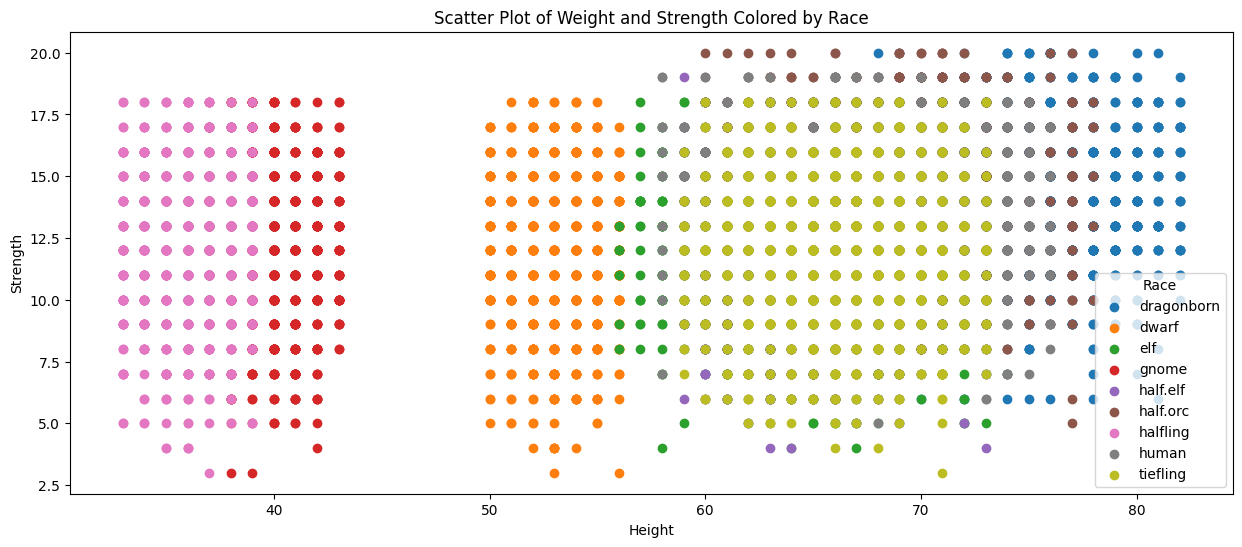

In [120]:
# plot the data with color label between weight and strength
plt.figure(figsize=(15, 6))

for r in unique_races:
    indices = [i for i, x in enumerate(race) if x == r]
    plt.scatter([height[i] for i in indices], [strength[i] for i in indices], label=r)
plt.title('Scatter Plot of Weight and Strength Colored by Race')
plt.xlabel('Height')
plt.ylabel('Strength')
plt.legend(title='Race')
plt.show()

## APPENDIX
- Plot the color labeled data from the race tag
- Using scikit-learn_som to cluster the data
    * scikit-learn_som is a easy tool to do som but it has less adjustment (don't have iteration, learning rate, and radius (neighbor influence))
- Other stats clustering
    * try several features clustering illustration.

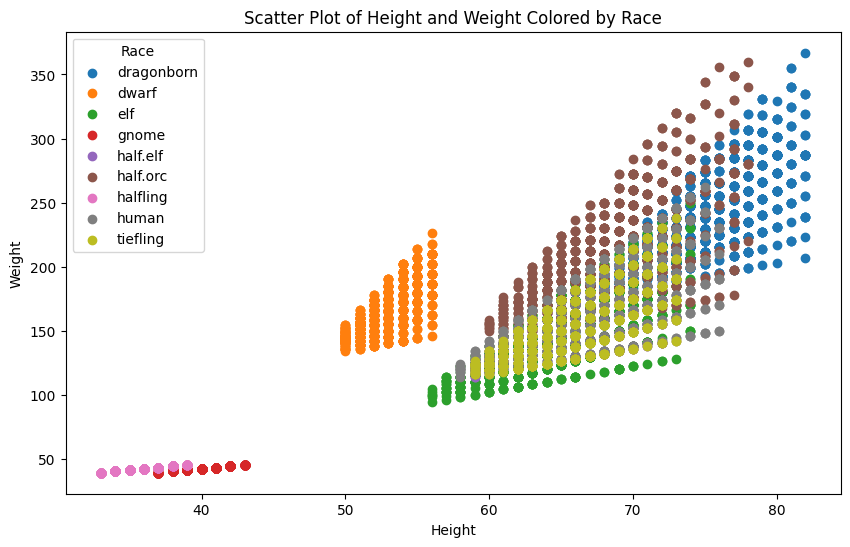

In [124]:
# get data 
df = pd.read_csv("stats.csv")
df.head()
# separate the features
race = df["race"].tolist()
height = df["height"].tolist()
weight = df["weight"].tolist()
speed = df["speed"].tolist()
strength = df["strength"].tolist()
dexterity = df["dexterity"].tolist()
constitution = df["constitution"].tolist()
intelligence = df["intelligence"].tolist()
wisdom = df["wisdom"].tolist()
charisma = df["charisma"].tolist()

# function to get unique values
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

no_of_race = len(unique(race))
unique_races = unique(race)

# Put the interested features in plt.scatter, it will show result of the pair of stats we want.
plt.figure(figsize=(10, 6))
for r in unique_races:
    indices = [i for i, x in enumerate(race) if x == r]
    plt.scatter([height[i] for i in indices], [weight[i] for i in indices], label=r)
plt.title('Scatter Plot of Height and Weight Colored by Race')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Race')
plt.show()

[[ 79 279]
 [ 79 331]
 [ 71 230]
 ...
 [ 66 137]
 [ 68 143]
 [ 70 201]]
['dragonborn' 'dragonborn' 'dragonborn' ... 'tiefling' 'tiefling'
 'tiefling']


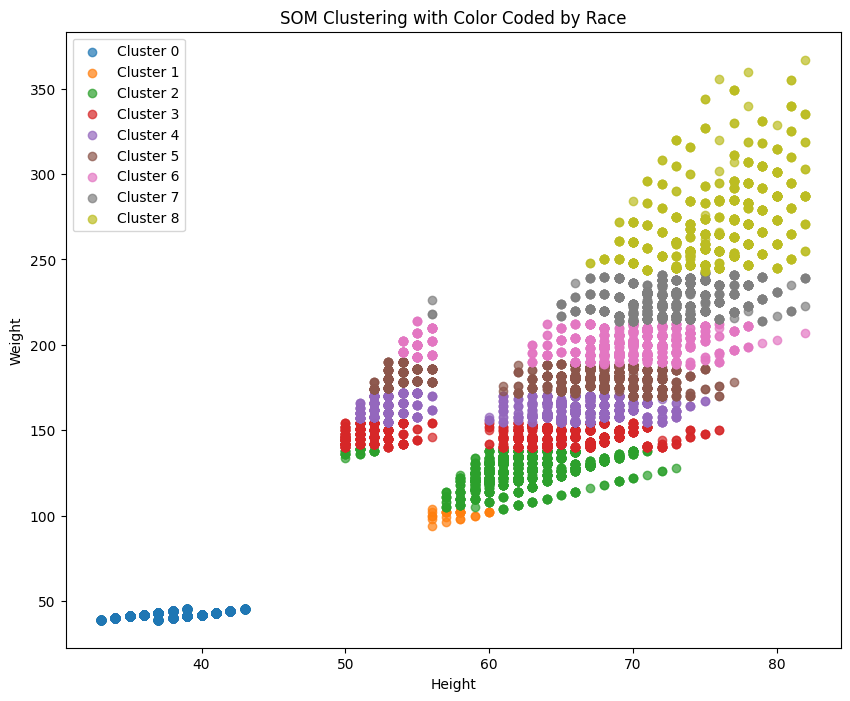

In [ ]:
from sklearn_som.som import SOM

# choose the interest data
# 1-height, 2-weight, 3-speed, 4-strength, 5-dexterity, 6-constitution, 7-wisdom, 8-intelligence, 9-charisma
interested_data = df.iloc[:, 1:3].values        # for this it will choose from 1 to 3-1 (2)
# interested_data = df.iloc[:, [1,3]].values    # for this it will choose  1 to 3
race_label = df.iloc[:,0].values

race_som = SOM(m=9, n=1, dim=2)
race_som.fit(interested_data)

predictions = race_som.predict(interested_data)
plt.figure(figsize=(10, 8))

# choose to plot any two stats in interested data 
for cluster_index in range(race_som.m):
    plt.scatter(interested_data[predictions == cluster_index, 0],
                interested_data[predictions == cluster_index, 1],
                label=f'Cluster {cluster_index}', alpha=0.7)

plt.title('SOM Clustering with Color Coded by Race')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

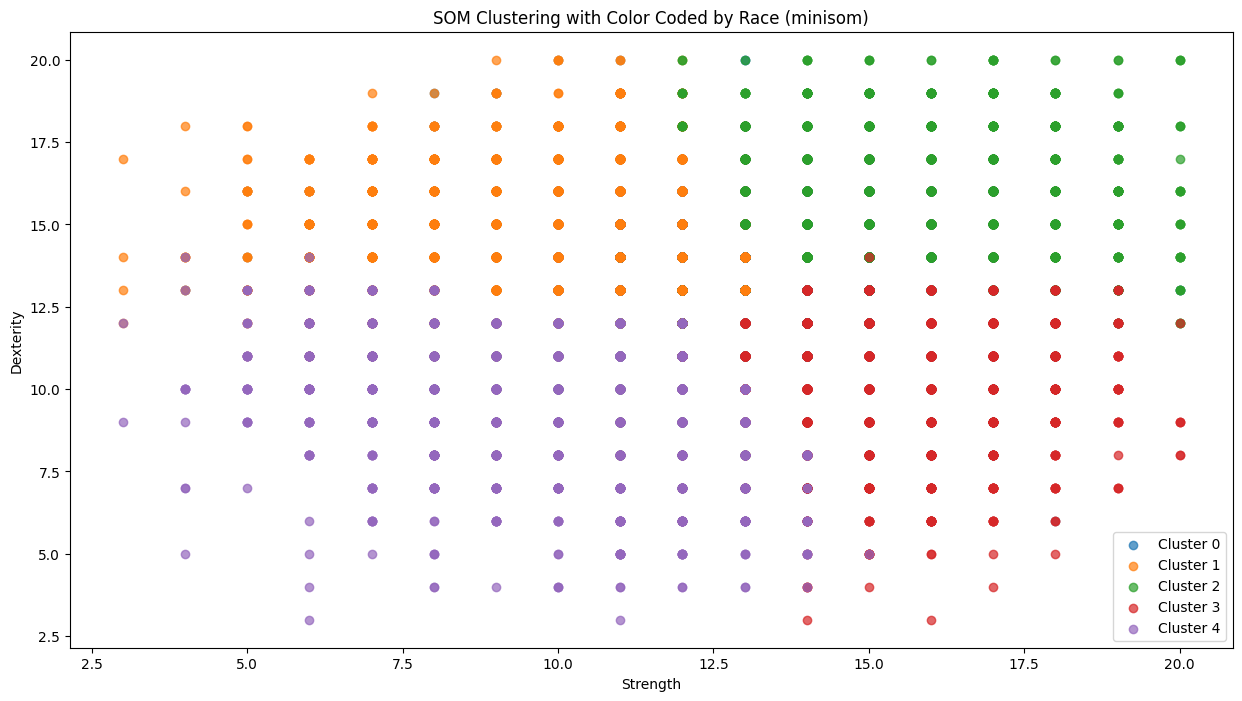

In [127]:
# Extracting the features (1-height, 4-strength)

# choose the interest data
# 1-height, 2-weight, 3-speed, 4-strength, 5-dexterity, 6-constitution, 7-wisdom, 8-intelligence, 9-charisma

# wanted_data = df.iloc[:, [1,4]].values        # for minimize data (doesn't implement here)
interested_data = df.iloc[:, [4,5,6]].values
# interested_data = df.iloc[:, 1:].values       # using all stats in computation


# X_train, interested_data, y_train, interested_race = train_test_split(wanted_data, race_label, test_size=0.1, random_state=42) # for minimize data (doesn't implement here)

# Specify the dimensions of the SOM grid
som_shape = (5, 1)

# Initialize the MiniSom object [sigma is radius, learning_rate is learning rate]
race_som = MiniSom(som_shape[0], som_shape[1], interested_data.shape[1], sigma=0.9, learning_rate=0.01)

# Train the SOM
race_som.train_random(interested_data, 100000)  # Adjust the number of epochs (here, 100000) as needed

# Get the cluster indices for each data point
predictions = np.array([race_som.winner(x) for x in interested_data])

# Plotting the scatter plot with colors based on race labels
plt.figure(figsize=(15, 8))

for cluster_index in range(race_som._weights.shape[0]):
    plt.scatter(interested_data[predictions[:, 0] == cluster_index, 0],
                interested_data[predictions[:, 0] == cluster_index, 1],
                label=f'Cluster {cluster_index}', alpha=0.7)

plt.title('SOM Clustering with Color Coded by Race (minisom)')
plt.xlabel('Strength')
plt.ylabel('Dexterity')
plt.legend()
plt.show()